# CSV Data

We have a file called "fifa.csv" in our working directory. Let's load it into a dataframe and print the top five entries. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fifa_df = pd.read_csv("fifa.csv")
fifa_df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Let's see how many columns are missing data and how many observations they're missing:

In [2]:
for column in fifa_df.columns[fifa_df.isnull().any()]:
    print(column + " is missing: " + str(sum(fifa_df[column].isnull())))

Club is missing: 241
Preferred Foot is missing: 48
International Reputation is missing: 48
Weak Foot is missing: 48
Skill Moves is missing: 48
Work Rate is missing: 48
Body Type is missing: 48
Real Face is missing: 48
Position is missing: 60
Jersey Number is missing: 60
Joined is missing: 1553
Loaned From is missing: 16943
Contract Valid Until is missing: 289
Height is missing: 48
Weight is missing: 48
LS is missing: 2085
ST is missing: 2085
RS is missing: 2085
LW is missing: 2085
LF is missing: 2085
CF is missing: 2085
RF is missing: 2085
RW is missing: 2085
LAM is missing: 2085
CAM is missing: 2085
RAM is missing: 2085
LM is missing: 2085
LCM is missing: 2085
CM is missing: 2085
RCM is missing: 2085
RM is missing: 2085
LWB is missing: 2085
LDM is missing: 2085
CDM is missing: 2085
RDM is missing: 2085
RWB is missing: 2085
LB is missing: 2085
LCB is missing: 2085
CB is missing: 2085
RCB is missing: 2085
RB is missing: 2085
Crossing is missing: 48
Finishing is missing: 48
HeadingAccura

Some of them are missing quite a few. We have more than 18,000 observations, so if it's under 180 (less than 1%), we can probably ignore it. Otherwise, we'll drop the entire column if it's missing too many. The Release Clause is interesting to me, though, so we'll just drop the rows that are missing there. We also don't care about photo, flag, or club logo URLs, so we'll drop those columns. 

In [3]:
fifa_df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)
fifa_df.dropna(subset=['Release Clause'], inplace=True)

In [4]:
#Reset the index so we don't run into problems later.
fifa_df.reset_index(inplace=True)

In [5]:
for column in fifa_df.columns[fifa_df.isnull().any()]:
    if sum(fifa_df[column].isnull()) > (len(fifa_df.index) / 100):
        fifa_df.drop([column], axis=1, inplace=True)

Now let's see how many are missing. 

In [6]:
for column in fifa_df.columns[fifa_df.isnull().any()]:
    print(column + " is missing: " + str(sum(fifa_df[column].isnull())))

None, perfect! It looks like a lot of our missing values that were less than 1% of our total number of observations were also missing their Release Clause data, so we dropped them all. 

Here are some summary statistics for the file (Age is self-explanatory, Overall is the player's overall rating, as calculated by FIFA): 

In [7]:
fifa_df[["Age", "Overall"]].describe()

,Age,Overall
count,16643.000000,16643.000000
mean,25.226221,66.162771
std,4.716588,7.008236
min,16.000000,46.000000
25%,21.000000,62.000000
50%,25.000000,66.000000
75%,29.000000,71.000000
max,45.000000,94.000000


How many FIFA players are right-footed?

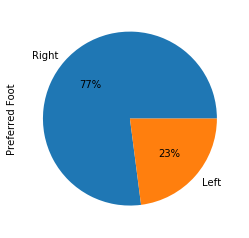

In [8]:
fifa_df['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

It looks like the majority of FIFA players are right-footed. It would be interesting to collect data on people in general to see whether this trend follows the general population or if right-footed people are somehow better suited to play in professional soccer.

How does Release Clause relate to Value? 

In [9]:
for i, val in enumerate(fifa_df['Release Clause']):
    if val[-1] == 'M':
        fifa_df.at[i, 'Release Clause'] = int(float(val[1:-1])*1000000)
    else:
        fifa_df.at[i, 'Release Clause'] = int(float(val[1:-1])*1000)

In [10]:
for i, val in enumerate(fifa_df['Value']):
    if val[-1] == 'M':
        fifa_df.at[i, 'Value'] = int(float(val[1:-1])*1000000)
    else:
        fifa_df.at[i, 'Value'] = int(float(val[1:-1])*1000)

In [11]:
fifa_df['Release Clause'] = fifa_df['Release Clause'].astype(int)

In [12]:
fifa_df['Value'] = fifa_df['Value'].astype(int)

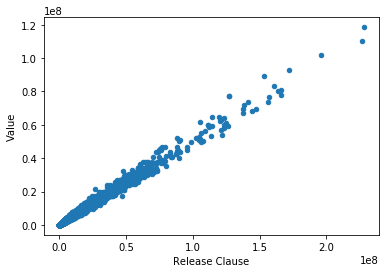

In [13]:
fifa_df.plot.scatter('Release Clause', 'Value')
plt.show()

It turns out that Release Clause and Value have an extremely linear relationship.

How does Wage relate to Value?

In [14]:
for i, val in enumerate(fifa_df['Wage']):
    if val[-1] == 'M':
        fifa_df.at[i, 'Wage'] = int(float(val[1:-1])*1000000)
    else:
        fifa_df.at[i, 'Wage'] = int(float(val[1:-1])*1000)

In [15]:
fifa_df['Wage'] = fifa_df['Wage'].astype(int)

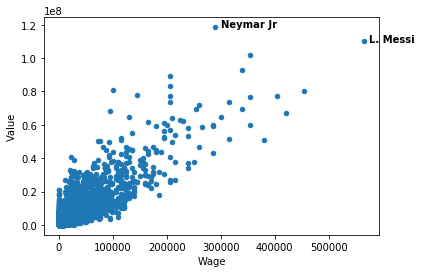

In [16]:
p1 = fifa_df.plot.scatter('Wage', 'Value')
p1.text(575000, 109500000, "L. Messi", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(300000, 118500000, "Neymar Jr", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

This makes our previous graph even more interesting. The Release Clause variable says how much another team must pay in order to buy that player's contract. It makes sense that their value is very closely related to their release clause. It's possible that their release clause is heavily weighted when considering how much a player is worth, or that their release clause is based on a player's value, which would both explain why the release clause and a player's worth are so linearly related. 

However, it appears that, while there is a generally linear relationship between a player's value and their wage, there are many more outliers, such as Lionel Messi and Neymar Jr.

# JSON data

In [17]:
import pandas as pd
json_df = pd.read_json("https://pkgstore.datahub.io/cryptocurrency/ethereum/ethereum_json/data/d4eaf003a3fb89cca33ef529b92820e1/ethereum_json.json")

In [18]:
print("Rows in dataframe: " + str(len(json_df.index)))
json_df.head(5)

Rows in dataframe: 1110


,activeAddresses,adjustedTxVolume(USD),averageDifficulty,blockCount,blockSize,date,exchangeVolume(USD),fees,generatedCoins,marketcap(USD),medianFee,medianTxValue(USD),paymentCount,price(USD),txCount,txVolume(USD)
0,NaN,NaN,121335493201,6911,4449897,2015-07-30,NaN,NaN,39311.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,602941851594,6863,3994458,2015-07-31,NaN,NaN,36191.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,887254173531,5293,3044344,2015-08-01,NaN,NaN,27702.18750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1020253707550,5358,3112348,2015-08-02,NaN,NaN,28227.18750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1125837358850,5280,3099953,2015-08-03,NaN,NaN,27976.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like there are lots of missing values. Let's drop them and see how the length is affected.

In [19]:
print("Rows in trimmed dataframe: " + str(len(json_df.dropna().index)))

Rows in trimmed dataframe: 1102


So it only drops 8 rows out of over 1100. Let's go ahead and replace our dataframe and drop the missing variables.

In [20]:
json_df.dropna(inplace=True)
json_df.reset_index(inplace=True)
json_df.head(5)

,index,activeAddresses,adjustedTxVolume(USD),averageDifficulty,blockCount,blockSize,date,exchangeVolume(USD),fees,generatedCoins,marketcap(USD),medianFee,medianTxValue(USD),paymentCount,price(USD),txCount,txVolume(USD)
0,8,1086.0,5.684487e+06,1470838650660,5189,3282693,2015-08-07,164329.0,37.318414,27437.65625,0.0,0.001321,41.611713,1977.0,2.830000,2050.0,5.684487e+06
1,9,826.0,3.789968e+07,1586123528940,5256,3508878,2015-08-08,674188.0,68.099970,27943.43750,167911008.0,0.001243,0.279000,1973.0,2.790000,2881.0,3.789968e+07
2,10,732.0,8.236055e+05,1709479787480,5123,3167541,2015-08-09,532170.0,14.098950,27178.28125,42637600.0,0.001223,7.061360,1213.0,0.706136,1329.0,8.236055e+05
3,11,1001.0,1.194050e+06,1837695763270,5255,3316883,2015-08-10,405283.0,31.165144,27817.34375,43130000.0,0.001228,0.359784,1451.0,0.713989,2037.0,1.194050e+06
4,12,2342.0,1.053130e+06,2036390797500,5280,3653834,2015-08-11,1463100.0,11.311449,28027.81250,42796500.0,0.001218,0.034006,3029.0,0.708087,4963.0,1.053130e+06


That looks a lot better. Now let's convert dates so we can use them in plots.

In [21]:
import datetime as dt

x = [dt.datetime.strptime(str(d)[:-9],'%Y-%m-%d').date() for d in json_df['date']]
json_df['date'] = x

Now that that's converted, let's show some summary statistics for our table: 

In [22]:
json_df[['date', 'averageDifficulty', 'blockCount', 'blockSize', 'fees']].describe()

,averageDifficulty,blockCount,blockSize,fees
count,1.102000e+03,1102.000000,1.102000e+03,1102.000000
mean,9.996654e+14,5527.687840,4.701811e+07,305.877297
std,1.268281e+15,723.307729,5.342374e+07,546.392845
min,1.470839e+12,2829.000000,2.555486e+06,5.507452
25%,3.451544e+13,5090.750000,8.508348e+06,30.188337
50%,1.198243e+14,5860.500000,1.114435e+07,60.496571
75%,1.913404e+15,6022.750000,9.215752e+07,379.900318
max,3.606036e+15,6409.000000,1.836944e+08,5862.526226


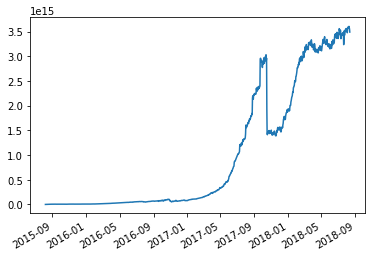

In [23]:
import matplotlib.dates as mdates

plt.plot(json_df['date'], json_df['averageDifficulty'])
plt.gcf().autofmt_xdate()

This is really interesting. It shows that the average difficulty of mining an Ethereum block tracks pretty closely with its popularity. The big spike in the middle shows the time at the end of 2017 when cryptocurrencies were really taking off, and then their collapse as well. 

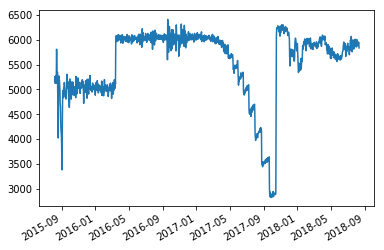

In [24]:
plt.plot(json_df['date'], json_df['blockCount'])
plt.gcf().autofmt_xdate()

It's possible that I'm misunderstanding the blockCount variable, because I thought it was just counting how many blocks are in the blockchain. However, this leads me to believe that it might be the number of transactions in a block, possibly. 

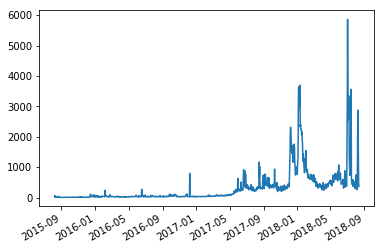

In [25]:
plt.plot(json_df['date'], json_df['fees'])
plt.gcf().autofmt_xdate()

Apparently, blockchain miners sometimes require a huge amount of fees and sometimes don't. I'm not sure what drives that, but it looks fairly random. 

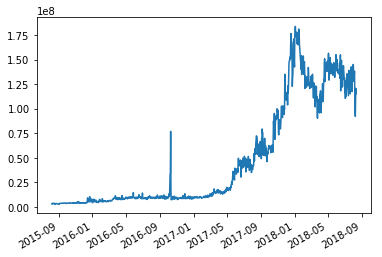

In [26]:
plt.plot(json_df['date'], json_df['blockSize'])
plt.gcf().autofmt_xdate()

I wonder what caused the spike at the end of 2016? Needs some research.

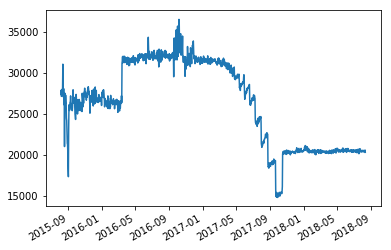

In [27]:
plt.plot(json_df['date'], json_df['generatedCoins'])
plt.gcf().autofmt_xdate()

This mostly makes sense. In theory, the number of coins generated per block should always decrease, but it could be that Vitalik Buterin decided to change the way that worked after the big crash at the end of 2017.

# SQL Data

In [28]:
import sqlite3
conn = sqlite3.connect("salaries.sqlite")

import pandas as pd
sql_df = pd.read_sql_query("SELECT * FROM Salaries;", conn)
sql_df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [29]:
sql_df.columns[sql_df.isnull().any()]

Index([], dtype='object')

It looks like there are no missing values in our data! That's great. Let's look at the distribution of pay.

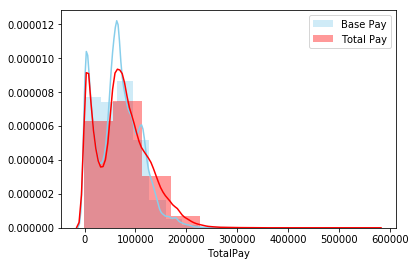

In [32]:
import seaborn as sns
sql_df.BasePay = pd.to_numeric(sql_df.BasePay, errors="coerce")
sql_df.TotalPay = pd.to_numeric(sql_df.TotalPay, errors="coerce")
sns.distplot(sql_df.BasePay.fillna(0.0), kde=True, bins=10, color="skyblue", label="Base Pay")
sns.distplot(sql_df.TotalPay.fillna(0.0), kde=True, bins=10, color="red", label="Total Pay")
plt.legend()
plt.show()

In [33]:
sql_df.TotalPay.groupby(sql_df.Year).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,71744.103871,47498.706594,0.00,36810.7600,68213.240,102512.680,567595.43
2012,36766.0,74113.262265,49523.904319,0.00,37560.6075,70714.680,104099.170,362844.66
2013,37606.0,77611.443142,52854.774783,0.00,36754.9950,74500.015,109637.670,347102.32
2014,38123.0,75463.918140,51697.713029,-618.13,33436.2100,72359.980,107974.445,471952.64


There are certainly outliers here. We're not doing any regression, though, so we'll leave it alone for now. If we were to work with average pay, we would probably want to look at median as opposed to mean.